# Age and Gender Prediction - CNN

## Installing Libraries

In [2]:
#installing opendatasets to donwload the UTKFace Dataset
!pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 15.1 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=e028edabd297aa228088f28b4073dee2e84d7aeabacb8865d0893fd8abf6eb6b
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/50/0a/6a/77a4f3a534f0e5fd0909a376bbdfc88238a43eb2ac35947dc7
Successfully built kaggle


In [26]:
!pip install pydot
!pip install graphviz

## Importing the Libraries

In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import opendatasets as od
import seaborn as sb
import pandas as pd
import numpy as np
import warnings
import os

warnings.filterwarnings
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

## Downloading the Dataset from Kaggle

In [7]:
if os.getcwd() == "/home/studio-lab-user/CZ4042-age-gender-pred":
    od.download('https://www.kaggle.com/datasets/jangedoo/utkface-new')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  recstu


Your Kaggle Key:

  ································


100%|██████████| 331M/331M [00:08<00:00, 39.3MB/s] 


## Loading the Dataset

In [5]:
BASE_DIR = "/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/utkface-new/UTKFace/"

In [6]:
# Labels that the images have -= age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    info = filename.split('_')
    age = int(info[0])
    gender = int(info[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [7]:
print(f"Number of Images: {len(image_paths)}")
print(f"Number of Age Labels: {len(age_labels)}")
print(f"Number of Gender Labels: {len(gender_labels)}")

Number of Images: 23708
Number of Age Labels: 23708
Number of Gender Labels: 23708


In [8]:
#Creating a dictionary with all the information
info_dict = {'image': image_paths, 'age': age_labels, 'gender': gender_labels}

#Converting to DataFrames
df = pd.DataFrame(info_dict)
df

,image,age,gender
0,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,9,1
1,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,36,0
2,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,86,1
3,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,26,1
4,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,1,1
...,...,...,...
23703,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,35,0
23704,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,52,0
23705,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,26,0
23706,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,28,0


In [9]:
#map labels for gender - for display purposes
gender_dict = {0: 'Male', 1:'Female'}

## Exploratory Data Analysis

In [10]:
from PIL import Image

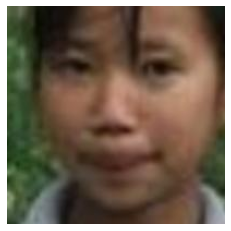

In [11]:
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img); #the ; removes the additional text

### Class Distribution

#### Age

/Users/sankeerthana/miniforge3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

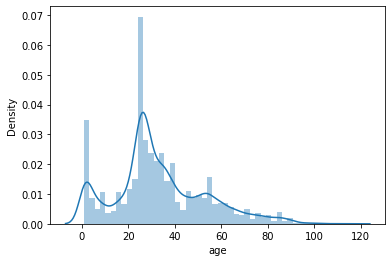

In [12]:
sb.distplot(df['age'])

#### Gender

/Users/sankeerthana/miniforge3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

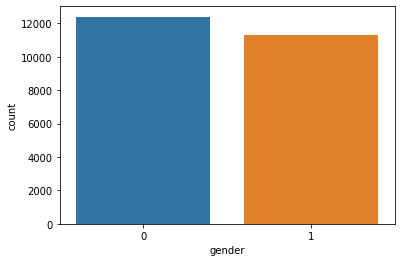

In [13]:
sb.countplot(df['gender'])

### Displaying a Grid of Images

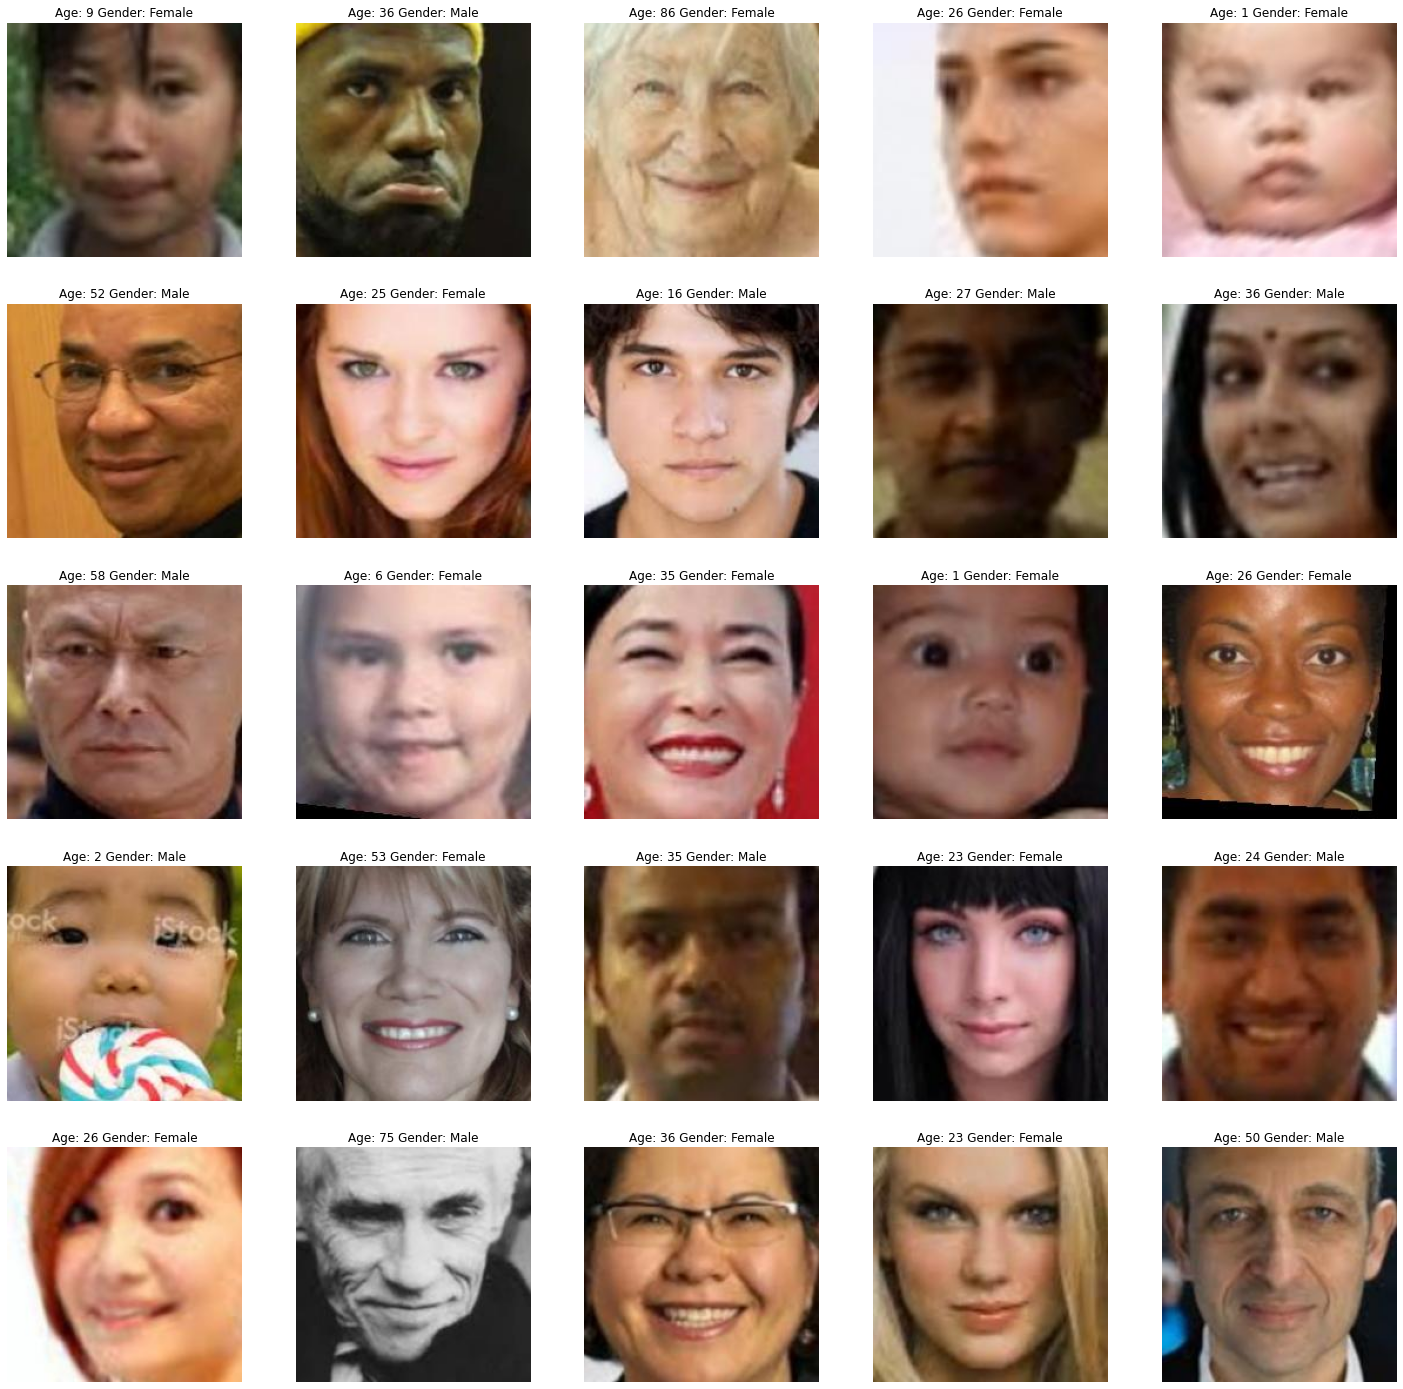

In [14]:
plt.figure(figsize=(25,25))
files = df.iloc[0:25] #getting the first 25 imgs

#iterating the 3 columns - itetuples gives the index as well
for index, file, age, gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(file) #loading as array
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Feature Extraction

In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [16]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

/Users/sankeerthana/miniforge3/envs/ml/lib/python3.9/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [17]:
X.shape

(23708, 128, 128, 1)

### Normalization of Images

In [18]:
X = X/255.0 

### Converting to Numpy Array

In [19]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

## Creating the Model

Input : Image
<br>
Outputs : 2 Outputs
<br>
1. Classification output [Gender]
<br>
2. Regression output [Age]

In [20]:
input_shape = (128,128,1)

In [21]:
#Input Layer
inputs = Input((input_shape))

#Convolutional Layers
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
max_pooling1 = MaxPooling2D(pool_size=(2,2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu')(max_pooling1)
max_pooling2 = MaxPooling2D(pool_size=(2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(max_pooling2)
max_pooling3 = MaxPooling2D(pool_size=(2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(max_pooling3)
max_pooling4 = MaxPooling2D(pool_size=(2,2))(conv_4)

#Flattening Layer - flattens the weights matrix into a weights vector
flatten = Flatten()(max_pooling4)

#Fully Connected Layers - joining point
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

#Dropout Layers
dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

#Output Layers
output_1 = Dense(1, activation='sigmoid', name='gender_output')(dropout_1) #Classification output
output_2 = Dense(1, activation='relu', name='age_output')(dropout_2) #Regression output 

#Combining the components
model = Model(inputs=[inputs], outputs=[output_1, output_2])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-09 19:38:44.088890: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-09 19:38:44.088981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 61, 61, 64)   18496       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [23]:
#Loss: BCE - classification; MAE - Regression
model.compile(loss=['binary_crossentropy', 'mse'], optimizer='adam', metrics=['accuracy']) 

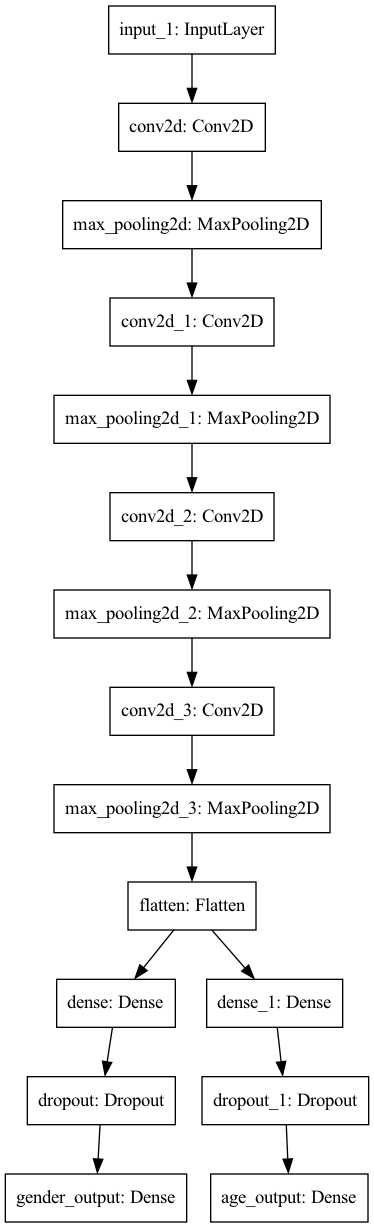

In [24]:
#plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

## Training the Model

In [28]:
# Save once each only
cp_callback_gender = tf.keras.callbacks.ModelCheckpoint(
     filepath='/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/baseline_100epochs/model-best-gender.h5', 
     save_freq='epoch', verbose=1, monitor='val_gender_output_accuracy', mode='max', save_best_only=True, 
     save_weights_only=False, 
)   

cp_callback_age= tf.keras.callbacks.ModelCheckpoint(
     filepath='/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/baseline_100epochs/model-best-age.h5', 
     save_freq='epoch', verbose=1, monitor='val_age_output_loss', mode='min', save_best_only=True, 
     save_weights_only=False, 
) 

In [29]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=100, validation_split=0.2, callbacks=[cp_callback_age, cp_callback_gender])

Epoch 1/100
593/593 [==============================] - 45s 76ms/step - loss: 55.3775 - gender_output_loss: 0.2530 - age_output_loss: 55.1245 - gender_output_accuracy: 0.8873 - age_output_accuracy: 0.0170 - val_loss: 82.7124 - val_gender_output_loss: 0.2819 - val_age_output_loss: 82.4304 - val_gender_output_accuracy: 0.8792 - val_age_output_accuracy: 0.0086

Epoch 00001: val_age_output_loss improved from inf to 82.43041, saving model to /Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/baseline_100epochs/model-best-age.h5

Epoch 00001: val_gender_output_accuracy improved from -inf to 0.87916, saving model to /Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/baseline_100epochs/model-best-gender.h5
Epoch 2/100
593/593 [==============================] - 46s 77ms/step - loss: 49.8789 - gender_output_loss: 0.2366 - age_output_loss: 49.6423 - gender_output_accuracy: 0.8972 - age_output_accuracy: 0.0169 - v

In [30]:
#saving the model
model.save("baseline_100epochs")

2022-11-09 21:19:26.925001: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: baseline_100epochs/assets


In [34]:
!pwd

/home/studio-lab-user/CZ4042-age-gender-pred


## Plotting Results

### Gender

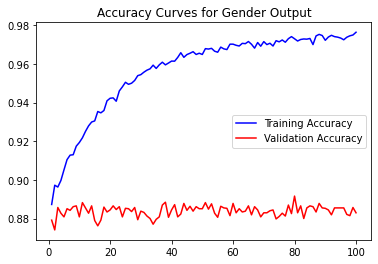

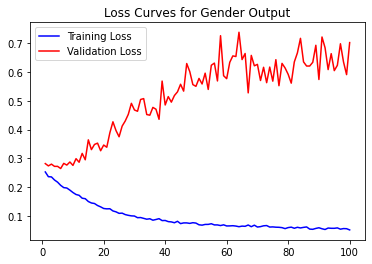

In [31]:
epochs = range(1,101)

gender_train_accuracy = history.history['gender_output_accuracy']
gender_val_accuracy = history.history['val_gender_output_accuracy']

plt.plot(epochs,gender_train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs,gender_val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy Curves for Gender Output')
plt.legend()
plt.figure()

gender_train_loss = history.history['gender_output_loss']
gender_val_loss = history.history['val_gender_output_loss']

plt.plot(epochs,gender_train_loss, 'b', label='Training Loss')
plt.plot(epochs,gender_val_loss, 'r', label='Validation Loss')
plt.title('Loss Curves for Gender Output')
plt.legend()
plt.show()

### Age

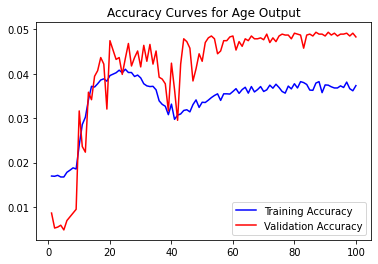

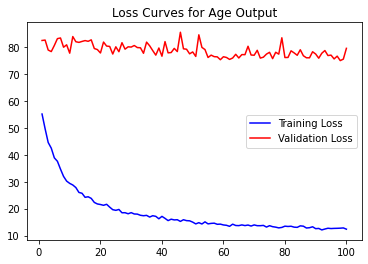

In [32]:
age_train_accuracy = history.history['age_output_accuracy']
age_val_accuracy = history.history['val_age_output_accuracy']

plt.plot(epochs, age_train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, age_val_accuracy, 'r', label='Validation Accuracy')
plt.title('Accuracy Curves for Age Output')
plt.legend()
plt.figure()

age_train_loss = history.history['age_output_loss']
age_val_loss = history.history['val_age_output_loss']

plt.plot(epochs, age_train_loss, 'b', label='Training Loss')
plt.plot(epochs, age_val_loss, 'r', label='Validation Loss')
plt.title('Loss Curves for Age Output')
plt.legend()
plt.show()

## Prediction on Test Data

Ground Truth Labels - Gender : Female, Age : 17
Predictions - Gender : Female, Age : 17


2022-11-09 21:20:02.096438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


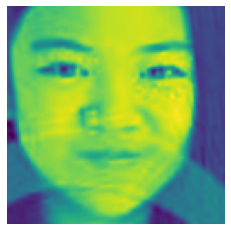

In [33]:
image_index = 4894

#Model Prediction
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print(f"Ground Truth Labels - Gender : {gender_dict[y_gender[image_index]]}, Age : {y_age[image_index]}")
print(f"Predictions - Gender : {pred_gender}, Age : {pred_age}")
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128)) #can add in cmap = 'gray'

In [34]:
score = model.evaluate(X, [y_gender, y_age])

741/741 [==============================] - 17s 23ms/step - loss: 22.7480 - gender_output_loss: 0.1529 - age_output_loss: 22.5952 - gender_output_accuracy: 0.9717 - age_output_accuracy: 0.0467


In [35]:
score_dict = {}

for i in range(len(score)):
    score_dict[model.metrics_names[i]] = score[i]
    
score_dict

{'loss': 22.748016357421875,
 'gender_output_loss': 0.15286317467689514,
 'age_output_loss': 22.59515953063965,
 'gender_output_accuracy': 0.9716551303863525,
 'age_output_accuracy': 0.04665092006325722}

### Loading Test Data

In [40]:
BASE_DIR = "/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/processed_face_front"

# Labels that the images have -= age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    info = filename.split('_')
    age = int(info[0])
    gender = int(info[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/24993 [00:00<?, ?it/s]

In [41]:
print(f"Number of Images: {len(image_paths)}")
print(f"Number of Age Labels: {len(age_labels)}")
print(f"Number of Gender Labels: {len(gender_labels)}")

Number of Images: 24993
Number of Age Labels: 24993
Number of Gender Labels: 24993


In [42]:
#Creating a dictionary with all the information
test_info_dict = {'image': image_paths, 'age': age_labels, 'gender': gender_labels}

#Converting to DataFrames
test_df = pd.DataFrame(test_info_dict)
test_df

,image,age,gender
0,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,36,1
1,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,24,1
2,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,26,0
3,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,53,0
4,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,41,1
...,...,...,...
24988,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,30,0
24989,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,43,1
24990,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,29,0
24991,/Users/sankeerthana/Documents/NTU/YEAR_4/CZ404...,46,1


In [45]:
test_df['image'][0]

'/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/processed_face_front/36_1_0_36301.jpg'

In [43]:
#map labels for gender - for display purposes
gender_dict = {0: 'Male', 1:'Female'}

/Users/sankeerthana/miniforge3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

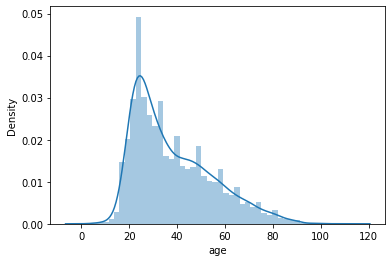

In [44]:
sb.distplot(test_df['age'])

/Users/sankeerthana/miniforge3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

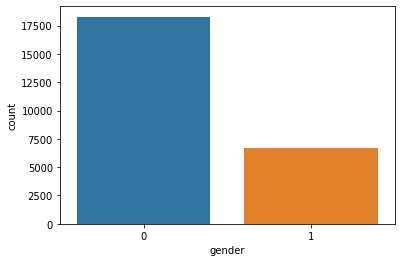

In [46]:
sb.countplot(test_df['gender'])

In [47]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features),128,128,1)
    return features

In [48]:
X_test = extract_features(test_df['image'])

  0%|          | 0/24993 [00:00<?, ?it/s]

/Users/sankeerthana/miniforge3/envs/ml/lib/python3.9/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [49]:
X_test.shape

(24993, 128, 128, 1)

In [50]:
X_test = X_test/255.0 

In [51]:
y_test_gender = np.array(test_df['gender'])
y_test_age = np.array(test_df['age'])

In [52]:
test_score = model.evaluate(X_test, [y_test_gender, y_test_age])

782/782 [==============================] - 20s 26ms/step - loss: 260.2307 - gender_output_loss: 2.1138 - age_output_loss: 258.1168 - gender_output_accuracy: 0.6391 - age_output_accuracy: 0.0000e+00


In [53]:
test_score_dict = {}

for i in range(len(test_score)):
    test_score_dict[model.metrics_names[i]] = test_score[i]
    
test_score_dict

{'loss': 260.230712890625,
 'gender_output_loss': 2.113781690597534,
 'age_output_loss': 258.1167907714844,
 'gender_output_accuracy': 0.6390589475631714,
 'age_output_accuracy': 0.0}

In [54]:
best_age_model = tf.keras.models.load_model("/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/baseline_100epochs/model-best-age.h5")
best_gender_model = tf.keras.models.load_model("/Users/sankeerthana/Documents/NTU/YEAR_4/CZ4042/Group_Assignment/CZ4042-Age-Gender-Prediction/baseline_100epochs/model-best-gender.h5")

In [55]:
best_age_score = best_age_model.evaluate(X_test, [y_test_gender, y_test_age])

  1/782 [..............................] - ETA: 4:19 - loss: 358.4844 - gender_output_loss: 1.4211 - age_output_loss: 357.0632 - gender_output_accuracy: 0.6875 - age_output_accuracy: 0.0000e+00

2022-11-09 22:10:09.949666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 21s 26ms/step - loss: 239.8693 - gender_output_loss: 1.3743 - age_output_loss: 238.4950 - gender_output_accuracy: 0.6992 - age_output_accuracy: 0.0000e+00


In [56]:
best_gender_score = best_gender_model.evaluate(X_test, [y_test_gender, y_test_age])

2022-11-09 22:10:39.749510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 21s 26ms/step - loss: 236.4494 - gender_output_loss: 1.4306 - age_output_loss: 235.0186 - gender_output_accuracy: 0.6925 - age_output_accuracy: 0.0000e+00


In [57]:
best_age_score_dict = {}

for i in range(len(best_age_score)):
    best_age_score_dict[model.metrics_names[i]] = best_age_score[i]
    
best_age_score_dict

{'loss': 239.86929321289062,
 'gender_output_loss': 1.3743445873260498,
 'age_output_loss': 238.49501037597656,
 'gender_output_accuracy': 0.6992357969284058,
 'age_output_accuracy': 0.0}

In [58]:
best_gender_score_dict = {}

for i in range(len(best_gender_score)):
    best_gender_score_dict[model.metrics_names[i]] = best_gender_score[i]
    
best_gender_score_dict

{'loss': 236.44937133789062,
 'gender_output_loss': 1.4306471347808838,
 'age_output_loss': 235.0186309814453,
 'gender_output_accuracy': 0.6925139427185059,
 'age_output_accuracy': 0.0}